#MNIST Digit Classification using CNN
#Author: Ayush Pandey

In [3]:
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageOps

np.random.seed(42)
tf.random.set_seed(42)

In [4]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Add channel dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [7]:
# Add noise for robustness
def add_noise(images):
    noise = 0.3 * np.random.normal(size=images.shape)
    noisy_images = images + noise
    return np.clip(noisy_images, 0., 1.)

x_train_noisy = add_noise(x_train)

In [8]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

In [9]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,274 (512.79 KB)

 Trainable params: 131,082 (512.04 KB)

 Non-trainable params: 192 (768.00 B)

In [10]:
# Learning rate scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6
)

In [11]:
# Train
history = model.fit(
    datagen.flow(x_train_noisy, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[lr_scheduler]
)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 56ms/step - accuracy: 0.7548 - loss: 0.7506 - val_accuracy: 0.9838 - val_loss: 0.0526 - learning_rate: 0.0010
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 55ms/step - accuracy: 0.9496 - loss: 0.1663 - val_accuracy: 0.9884 - val_loss: 0.0384 - learning_rate: 0.0010
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 54ms/step - accuracy: 0.9632 - loss: 0.1203 - val_accuracy: 0.9874 - val_loss: 0.0437 - learning_rate: 0.0010
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9675 - loss: 0.1094 - val_accuracy: 0.9897 - val_loss: 0.0355 - learning_rate: 0.0010
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9737 - loss: 0.0893 - val_accuracy: 0.9901 - val_loss: 0.0311 - learning_rate: 0.0010
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9743 - loss: 0.0873 - val_accuracy: 0.9919 - val_loss: 0.0313 - learning_rate: 0.0010
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9765 - loss: 0.0822

In [12]:
# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9883 - loss: 0.0397
Test Accuracy: 0.9907000064849854


In [13]:
# Save model
model.save("mnist_cnn_model.keras")
print("Model saved as mnist_cnn_model.keras")

Model saved as mnist_cnn_model.keras


In [20]:
 #----------- Custom Image Prediction -----------
def predict_digit(image_path):
    img = Image.open(image_path).convert('L')
    img = ImageEnhance.Contrast(img).enhance(1.5)
    img = img.resize((28,28))
    img = ImageOps.invert(img)

    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1,28,28,1)

    prediction = model.predict(img_array)
    digit = np.argmax(prediction)

    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {digit}")
    plt.axis('off')
    plt.show()

    return digit

Saving Screenshot 2024-10-23 164303.png to Screenshot 2024-10-23 164303.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


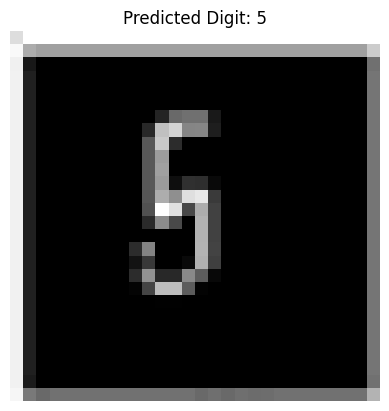

np.int64(5)

In [21]:
# TEST RUN
from google.colab import files
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
predict_digit(image_path)